In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf
import seaborn as sns
from keras.preprocessing.text import one_hot,Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation,Dropout,Dense
from keras.layers import Flatten,GlobalMaxPooling1D,Embedding,Conv1D,LSTM
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
!pip install -q kaggle

In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [39]:
data1 = pd.read_csv("/kaggle/input/emotion/Emotion(happy).csv")
data2 = pd.read_csv("/kaggle/input/emotion/Emotion(sad).csv")
data3 = pd.read_csv("/kaggle/input/emotion/Emotion(angry).csv")

In [40]:
data = pd.concat([data1, data2, data3], ignore_index=True)

In [41]:
data.shape

(2039, 2)

In [42]:
data.head()

,content,sentiment
0,Wants to know how the hell I can remember word...,happy
1,Love is a long sweet dream & marriage is an al...,happy
2,The world could be amazing when you are slight...,happy
3,My secret talent is getting tired without doin...,happy
4,"Khatarnaak Whatsapp Status Ever… Can\’t talk, ...",happy


In [43]:
data.isna().sum()

content      0
sentiment    0
dtype: int64

In [44]:
data.dtypes

content      object
sentiment    object
dtype: object

In [45]:
data.sentiment.value_counts()

happy    708
angry    696
sad      635
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

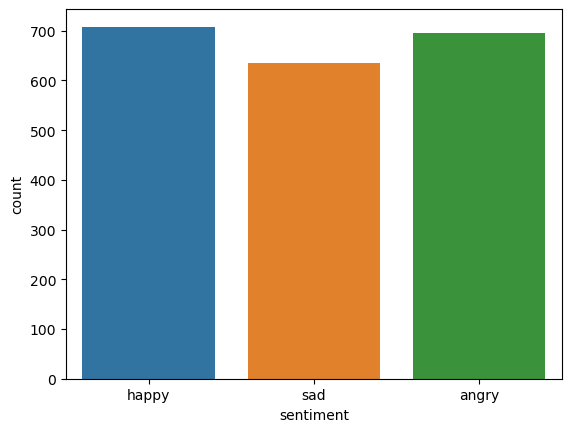

In [46]:
sns.countplot(x='sentiment',data=data)

In [47]:
tag_remover=re.compile(r'<[^>]+>')
def remove_tags(text):
    return tag_remover.sub(" ",text)

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
def preprocess_data(sent):
    sentence=sent.lower()
    sentence=remove_tags(sentence)
    sentence=re.sub(r'[^a-zA-Z]',' ',sentence)
    sentence=re.sub(r'\s+[a-zA-Z]\s+',' ',sentence)
    sentence=re.sub(r'\s+'," ",sentence)
    # remove stopwords
    pattern=re.compile(r'\b('+r'|'.join(stopwords.words('english'))+r')\b\s*')
    sentence=pattern.sub(" ",sentence)
    return sentence

In [50]:
s=data.iloc[2,0]
s

'The world could be amazing when you are slightly strange.'

In [51]:
preprocess_data(s)

' world could  amazing    slightly strange '

In [52]:
x=data.content.apply(preprocess_data)

In [53]:
data.content=x

In [59]:
data.head()

,content,sentiment
0,wants know hell remember words songs yea...,happy
1,love long sweet dream marriage alarm clock,happy
2,world could amazing slightly strange,happy
3,secret talent getting tired without anything,happy
4,khatarnaak whatsapp status ever talk wife around,happy


In [65]:
encoded_df = pd.get_dummies(data, columns=['sentiment'])
data = encoded_df

In [66]:
data.tail()

,content,sentiment_angry,sentiment_happy,sentiment_sad
2034,getting close walking away,1,0,0
2035,ever want slap stupid someone,1,0,0
2036,singing angry know punches face,1,0,0
2037,telling someone calm makes much angrier,1,0,0
2038,mistake letting go mistake letting,1,0,0


In [68]:
x_train,x_test,y_train,y_test=train_test_split(data.content,data[['sentiment_angry', 'sentiment_happy', 'sentiment_sad']],test_size=0.20,random_state=12)

In [69]:
x_test

442                                         want vitamin 
642                             type  person  want  meet 
654                    love      stars   sky  fish   sea 
469                   mean anything    mean everything   
825                                    sad   happy alone 
                              ...                        
482               people get suspicious trust disappears 
1900    never make  feel like nothing  make someone el...
166                                 real smile comes     
580           really care  someone  happiness matters    
872      one  ever loved anyone  way everyone wants   ...
Name: content, Length: 408, dtype: object

In [70]:
y_test

,sentiment_angry,sentiment_happy,sentiment_sad
442,0,1,0
642,0,1,0
654,0,1,0
469,0,1,0
825,0,0,1
...,...,...,...
482,0,1,0
1900,1,0,0
166,0,1,0
580,0,1,0


In [71]:
word_tokenizer=Tokenizer()
word_tokenizer.fit_on_texts(x_train)

In [72]:
x_train=word_tokenizer.texts_to_sequences(x_train)

In [73]:
x_test=word_tokenizer.texts_to_sequences(x_test)

In [74]:
vocab_length=len(word_tokenizer.word_index)+1
vocab_length

2139

In [75]:
x_train=pad_sequences(x_train,padding='post',maxlen=100)
x_test=pad_sequences(x_test,padding='post',maxlen=100)

In [76]:
x_train

array([[ 161, 1183, 1184, ...,    0,    0,    0],
       [   5,   94,  943, ...,    0,    0,    0],
       [ 366,   62,   80, ...,    0,    0,    0],
       ...,
       [ 502,   14, 1092, ...,    0,    0,    0],
       [   9,   60,    7, ...,    0,    0,    0],
       [ 901,    7,   27, ...,    0,    0,    0]], dtype=int32)

In [77]:
embedding_dict=dict()
glove_file=open("/kaggle/input/glove6b100dtxt/glove.6B.100d.txt",encoding='utf8')
for line in glove_file:
    records=line.split()
    word=records[0]
    vector_dimensions=np.asarray(records[1:],dtype='float32')
    embedding_dict[word]=vector_dimensions

glove_file.close()

In [78]:
embedding_matrix=np.zeros((vocab_length,100))
for word,index in word_tokenizer.word_index.items():
    embedding_vector=embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[index]=embedding_vector

In [79]:
embedding_layer=Embedding(input_dim=vocab_length,output_dim=100,weights=[embedding_matrix],input_length=100,trainable=False)
lstm_model=Sequential()
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))
lstm_model.add(Dense(3,activation='softmax'))

In [80]:
lstm_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          213900    
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 331,535
Trainable params: 117,635
Non-trainable params: 213,900
_________________________________________________________________


In [84]:
y_train

,sentiment_angry,sentiment_happy,sentiment_sad
245,0,1,0
1768,1,0,0
579,0,1,0
39,0,1,0
1327,0,0,1
...,...,...,...
1265,0,0,1
1277,0,0,1
1414,1,0,0
1691,1,0,0


In [85]:
lstm_model.fit(x_train,(y_train.sentiment_angry, y_train.sentiment_happy, y_train.sentiment_sad) ,epochs=20,batch_size=32,verbose=2,validation_split=0.2)

Epoch 1/20
41/41 - 3s - loss: 0.6980 - acc: 0.9494 - val_loss: 0.5840 - val_acc: 0.9572 - 3s/epoch - 69ms/step
Epoch 2/20
41/41 - 0s - loss: 0.5862 - acc: 0.9479 - val_loss: 0.5603 - val_acc: 0.9572 - 358ms/epoch - 9ms/step
Epoch 3/20
41/41 - 0s - loss: 0.5683 - acc: 0.9479 - val_loss: 0.5556 - val_acc: 0.9572 - 345ms/epoch - 8ms/step
Epoch 4/20
41/41 - 0s - loss: 0.5711 - acc: 0.9479 - val_loss: 0.5584 - val_acc: 0.9572 - 342ms/epoch - 8ms/step
Epoch 5/20
41/41 - 0s - loss: 0.5667 - acc: 0.9479 - val_loss: 0.5685 - val_acc: 0.9572 - 351ms/epoch - 9ms/step
Epoch 6/20
41/41 - 0s - loss: 0.5728 - acc: 0.9479 - val_loss: 0.5539 - val_acc: 0.9572 - 339ms/epoch - 8ms/step
Epoch 7/20
41/41 - 0s - loss: 0.5688 - acc: 0.9479 - val_loss: 0.5589 - val_acc: 0.9572 - 339ms/epoch - 8ms/step
Epoch 8/20
41/41 - 0s - loss: 0.5720 - acc: 0.9479 - val_loss: 0.5532 - val_acc: 0.9572 - 344ms/epoch - 8ms/step
Epoch 9/20
41/41 - 0s - loss: 0.5666 - acc: 0.9479 - val_loss: 0.5536 - val_acc: 0.9572 - 341ms/ep

In [91]:
lstm_model.evaluate(x_test, (y_test.sentiment_angry, y_test.sentiment_happy, y_test.sentiment_sad))

13/13 [==============================] - 0s 5ms/step - loss: 0.5618 - acc: 0.9559


[0.5617655515670776, 0.9558823704719543]

In [93]:
pred = lstm_model.predict(x_test)

13/13 [==============================] - 0s 3ms/step


In [103]:
np.argmax(pred[43])

1

In [ ]:
442                                         want vitamin 
642                             type  person  want  meet 
654                    love      stars   sky  fish   sea 
469                   mean anything    mean everything   
825                                    sad   happy alone 

In [102]:
pred[43]

array([4.1907385e-04, 9.9951088e-01, 7.0042050e-05], dtype=float32)

In [113]:
x = ""

In [114]:
x = preprocess_data(x)
x

'  haters thanks  making  famous  give sh  talk behind  back '

In [115]:
x=word_tokenizer.texts_to_sequences([x])

In [116]:
x=pad_sequences(x,padding='post',maxlen=100)

In [117]:
lstm_model.predict(x)

1/1 [==============================] - 0s 22ms/step


array([[6.6153681e-01, 3.3830136e-01, 1.6179535e-04]], dtype=float32)